In [1]:
import pandas as pd
import numpy as np
from functools import reduce
from datetime import datetime
import missingno as msno

In [2]:
# These are the datasets uploaded by Jacob to blob storage:
df_app = pd.read_parquet('../do_not_commit/Datasets/AppErrorEvents.parquet')
df_win = pd.read_parquet('../do_not_commit/Datasets/WindowsErrorEvents.parquet')
df_hang = pd.read_parquet('../do_not_commit/Datasets/AppHangEvents.parquet')


Do this in one or two ways:
1. Add use suffixes= in pd.merge() to explicitly assign each column/variable to its original error type.
2. Combine values for common columns into the same column, add a new column for each of the 4 for its error type, e.g. "Hang", and not assign column suffixes (use pd.concat([dataframes])).

Given from the original XML exercise columns with the same name in different sets represented the same variable, preferred approach is #2.


In [3]:
print(len(df_app))
print(len(df_win))
print(len(df_hang))

268149
9836
40811


In [4]:
df_app['error_type'] = "Application"
df_win['error_type'] = 'Windows'
df_hang['error_type'] = 'Hang'

In [5]:
events = pd.concat([df_app, df_win, df_hang])
events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318796 entries, 4740 to 7532
Data columns (total 72 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   RWB_EVENTRAWRESULTITEM_ID             318796 non-null  int64         
 1   RWB_ETL_EVENT_DESTINATION_IDENTIFIER  318796 non-null  int64         
 2   RWB_CREATE_TIMESTAMP                  318796 non-null  object        
 3   RWB_EFFECTIVE_DATE                    318796 non-null  object        
 4   ID                                    318796 non-null  int64         
 5   ClientItemKey                         318796 non-null  int64         
 6   LogName                               0 non-null       object        
 7   ProviderName                          318796 non-null  object        
 8   ProviderGUID                          318796 non-null  object        
 9   EventID                               318796 non-null  int

<AxesSubplot:>

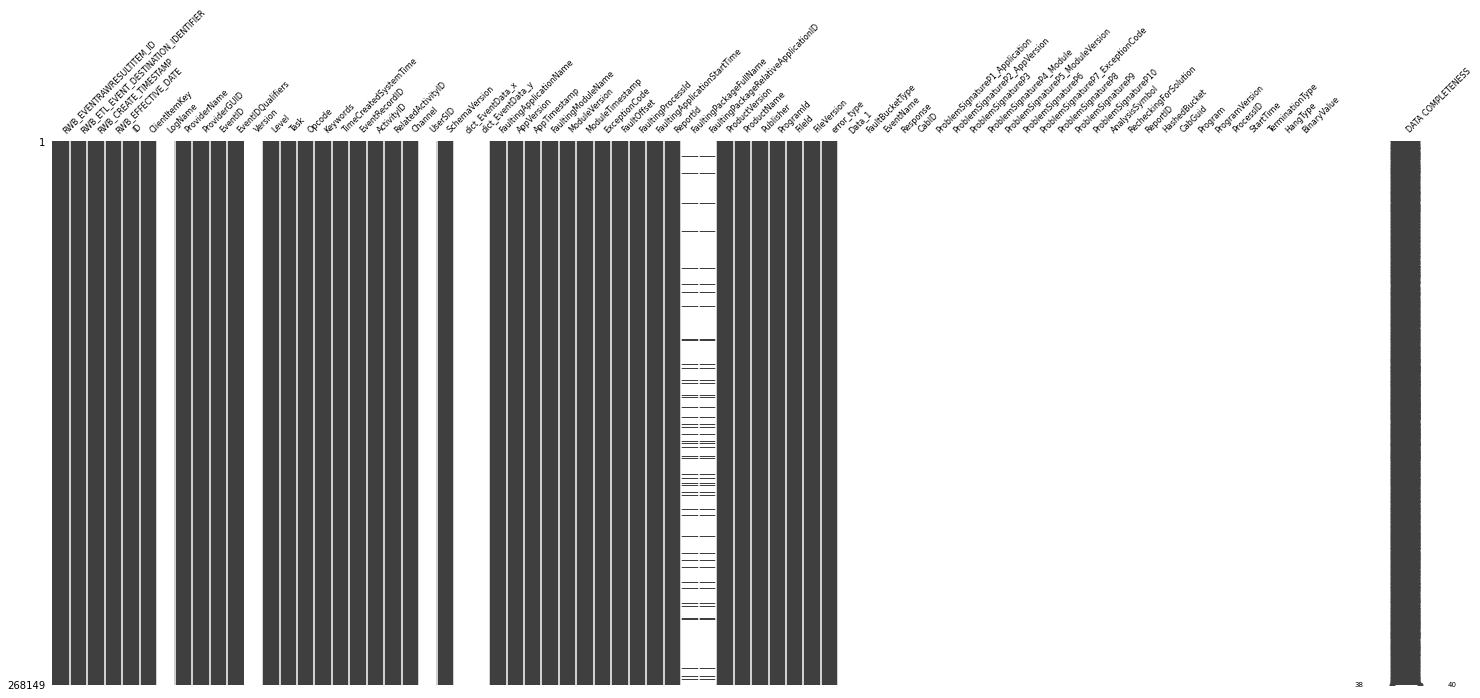

In [6]:
msno.matrix(events[events['error_type'] == 'Application'], labels=True, fontsize=8)

<AxesSubplot:>

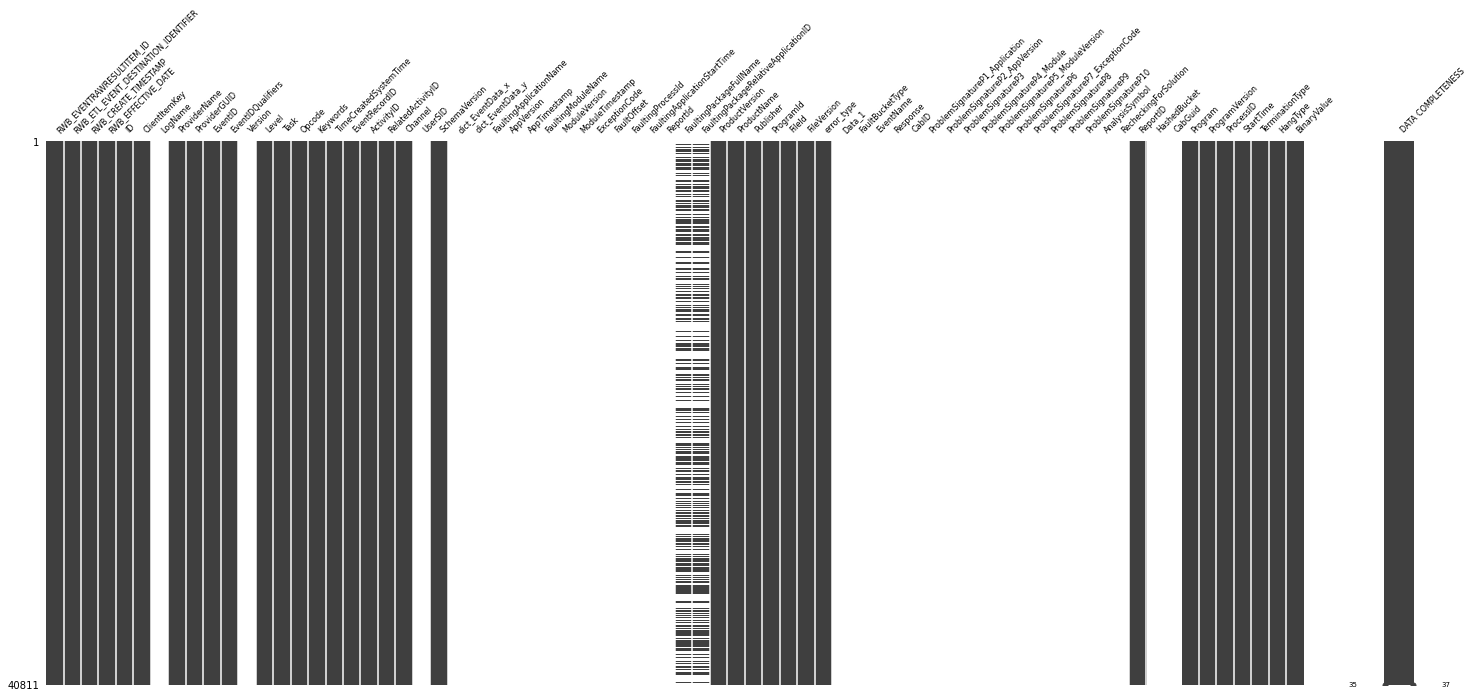

In [7]:
msno.matrix(events[events['error_type'] == 'Hang'], labels=True, fontsize=8)

<AxesSubplot:>

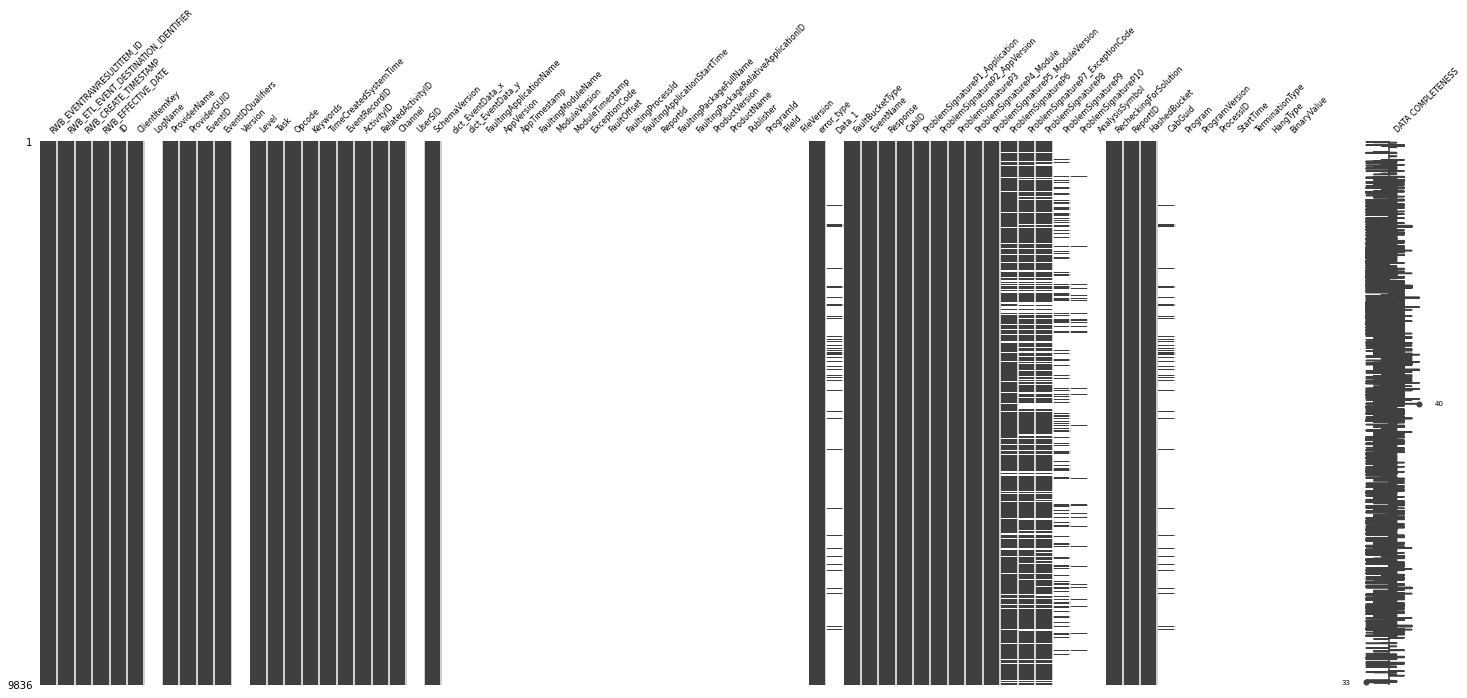

In [8]:
msno.matrix(events[events['error_type'] == 'Windows'], labels=True, fontsize=8)


# Join Machine data with Events data.


In [9]:
# From Azure database:
machines = pd.read_excel('../do_not_commit/Datasets/Persist_System_DISC.xlsx', )

<AxesSubplot:>

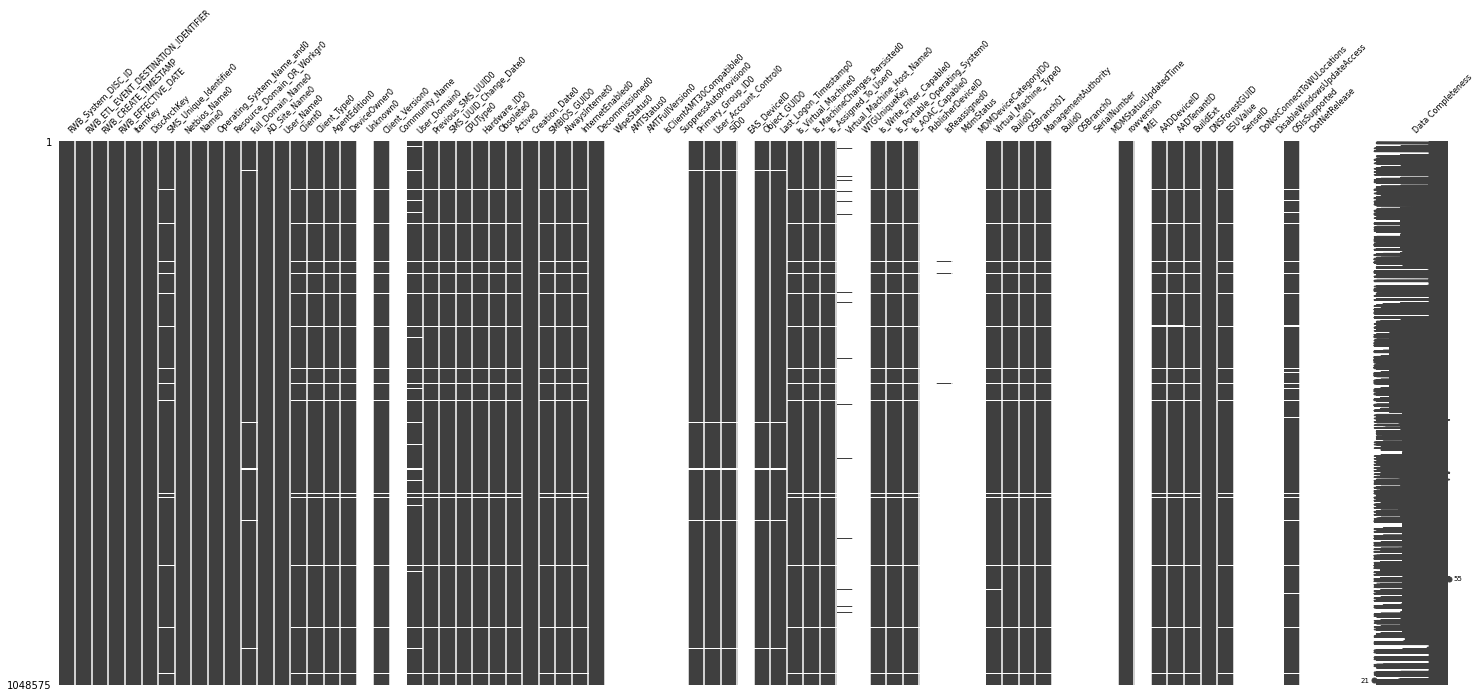

In [10]:
msno.matrix(machines, labels=True, fontsize=8)

In [11]:
# From blob storage:
incs = pd.read_csv('../do_not_commit/Datasets/ServiceNow_Incident.csv', low_memory=False)

<AxesSubplot:>

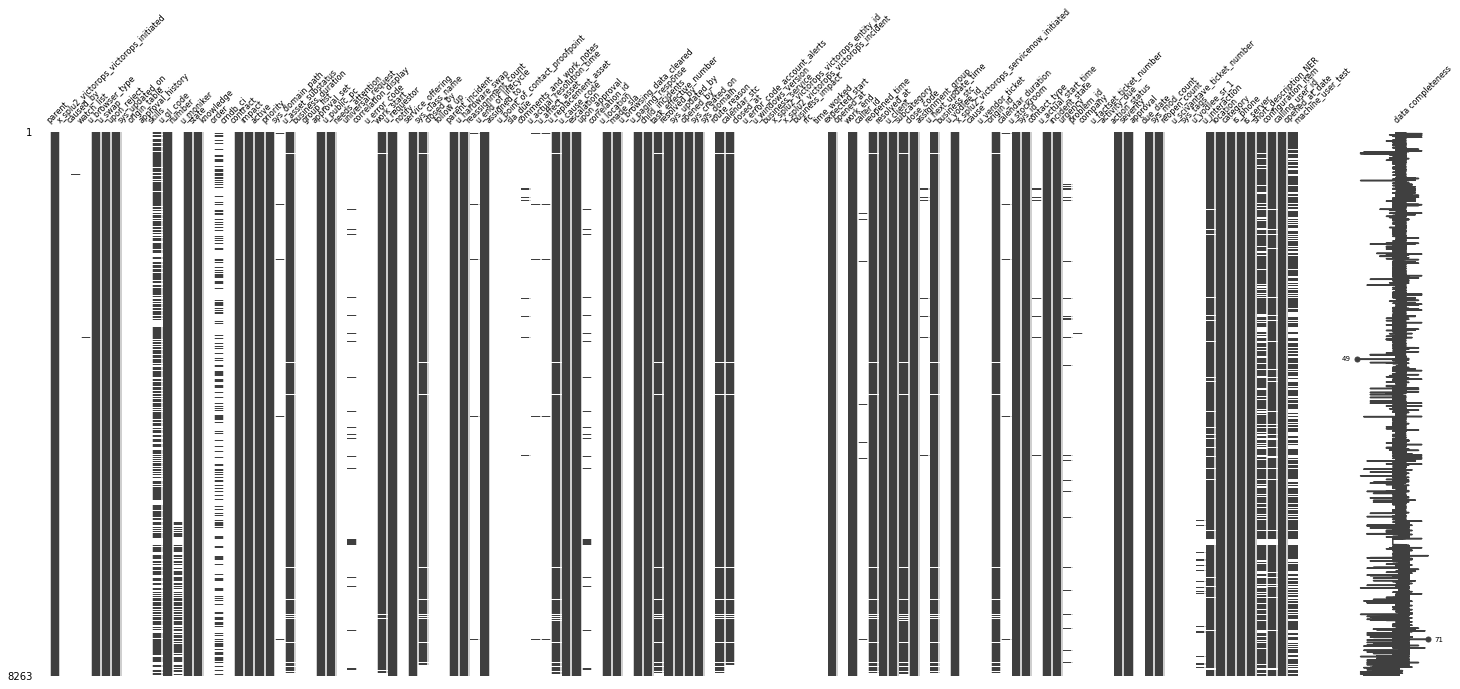

In [12]:
msno.matrix(incs, labels=True, fontsize=8)

In [13]:
machines['ClientItemKey'] = machines['ItemKey'].copy()

In [14]:
machines_events = events.merge(machines[['RWB_EFFECTIVE_DATE', 'ClientItemKey', 'Name0']], on=['RWB_EFFECTIVE_DATE', 'ClientItemKey'])

In [15]:
machines_events.sample(5)

,RWB_EVENTRAWRESULTITEM_ID,RWB_ETL_EVENT_DESTINATION_IDENTIFIER,RWB_CREATE_TIMESTAMP,RWB_EFFECTIVE_DATE,ID,ClientItemKey,LogName,ProviderName,ProviderGUID,EventID,...,HashedBucket,CabGuid,Program,ProgramVersion,ProcessID,StartTime,TerminationType,HangType,BinaryValue,Name0
62886,3247245,3439,2023-03-07 08:46:23 -06:00,2023-03-07,72057594083099205,16800929,None,Application Error,{00000000-0000-0000-0000-00000000000,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIL-L-U29617
160066,28490,812,2023-01-10 09:10:11 -06:00,2023-01-10,72057594079838141,16814399,None,Application Error,{00000000-0000-0000-0000-00000000000,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LOU-L-U34019
148654,702605,848,2023-01-16 09:09:28 -06:00,2023-01-16,72057594080530760,16814624,None,Application Error,{00000000-0000-0000-0000-00000000000,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIL-L-U33543
25007,4388036,4865,2023-03-30 08:46:21 -05:00,2023-03-30,72057594084277746,16814711,None,Application Error,{00000000-0000-0000-0000-00000000000,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRT-L-E17433
80352,2740300,2757,2023-02-24 08:46:16 -06:00,2023-02-24,72057594082589421,16805544,None,Application Error,{00000000-0000-0000-0000-00000000000,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WAK-L-U30503


<AxesSubplot:>

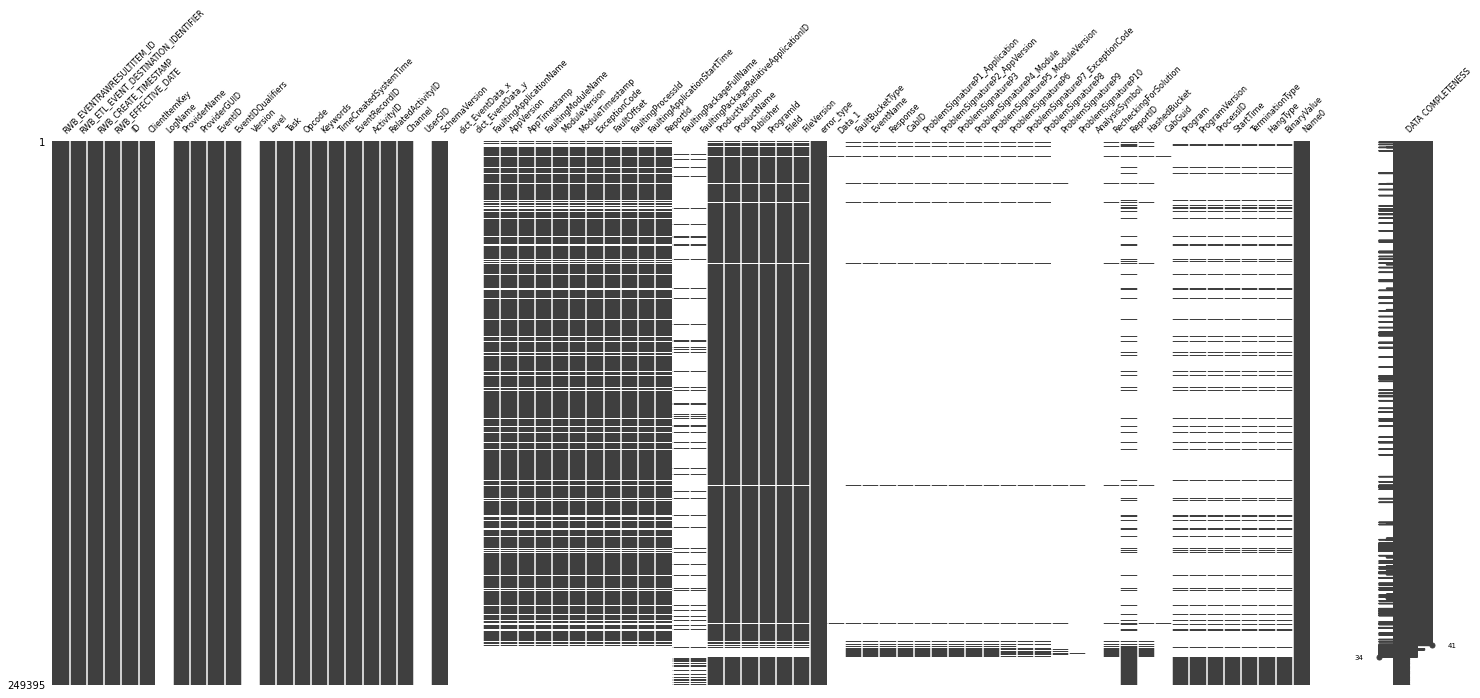

In [16]:
msno.matrix(machines_events, labels=True, fontsize=8)

<AxesSubplot:>

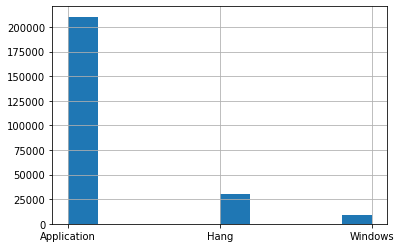

In [17]:
machines_events.sort_values(by=['error_type'])['error_type'].hist()


# Join Machines data with Boot data.


In [18]:
df_boot = pd.read_parquet('../do_not_commit/Datasets/BootEvents.parquet')
print(len(df_boot))

1593485


ValueError: zero-size array to reduction operation minimum which has no identity

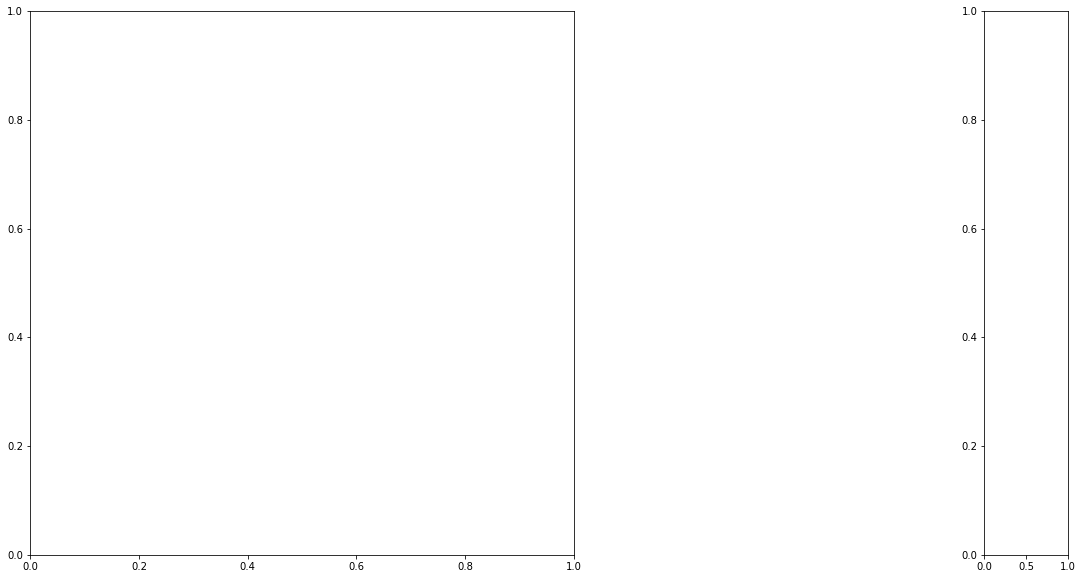

In [19]:
msno.matrix(events[events['error_type'] == 'Boot'], labels=True, fontsize=8)

In [21]:
df_boot['error_type'] = 'Boot'

In [22]:
df_boot

,RWB_EVENTBOOTRESULT_ID,RWB_ETL_EVENT_DESTINATION_IDENTIFIER,RWB_CREATE_TIMESTAMP,RWB_EFFECTIVE_DATE,ID,EventListID,ClientItemKey,GeneratedTime,UpdateDurationInMilliseconds,GPDurationInMilliseconds,...,param5,ActionDescription,ProductVersion,ProductName,Publisher,ProgramId,FileId,FileVersion,ReportId,error_type
0,947407,1251,2023-02-01 09:02:13 -06:00,2023-02-01,72057594043078438,3,16809009,2023-01-31 23:05:38.750,0,0,...,restart,Reboot initiated by NightWatchman 7.3,19982,NightWatchman,1E,000048C1361553810B674F3E6F986C5B9D8F00000000,00001F9D35B393AA598CB0FE68DE5F5E6D16E39CA7B1,623,None,Boot
1,947576,1251,2023-02-01 09:02:13 -06:00,2023-02-01,72057594043078607,3,16795727,2023-01-31 23:53:57.723,0,0,...,restart,None,8751,Microsoft® Windows® Operating System,Microsoft Corporation,00009D7160A474045C17F6CB8AEC9EA6F61300000000,0000D2A42C5059DB9D3A20C0944004ADE9B2584A27F3,1316,None,Boot
2,947577,1251,2023-02-01 09:02:13 -06:00,2023-02-01,72057594043078608,3,16795727,2023-01-31 23:53:57.723,0,0,...,restart,Your computer will restart at 1/30/2023 7:00:4...,11882,Endpoint Configuration Manager,Microsoft Corporation,0000AC84AF65760157FA6165F4EB441A1C9D00000000,0000756F01C4A36B3645E10FE6CC99C76511D107E598,1194,None,Boot
3,947644,1251,2023-02-01 09:02:13 -06:00,2023-02-01,72057594043078675,3,16797689,2023-02-01 00:18:51.667,0,0,...,restart,Your computer will restart at 1/30/2023 7:00:4...,11882,Endpoint Configuration Manager,Microsoft Corporation,0000AC84AF65760157FA6165F4EB441A1C9D00000000,0000756F01C4A36B3645E10FE6CC99C76511D107E598,1194,None,Boot
4,947738,1251,2023-02-01 09:02:13 -06:00,2023-02-01,72057594043078769,3,16800164,2023-02-01 00:45:31.780,0,0,...,restart,Reboot initiated by NightWatchman 7.3,19982,NightWatchman,1E,000048C1361553810B674F3E6F986C5B9D8F00000000,00001F9D35B393AA598CB0FE68DE5F5E6D16E39CA7B1,623,None,Boot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4353,1758503,11835,2023-07-18 08:35:28 -05:00,2023-07-18,72057594043916547,3,16813869,2023-07-18 13:32:52.237,0,40187,...,power off,None,8751,Microsoft® Windows® Operating System,Microsoft Corporation,00009D7160A474045C17F6CB8AEC9EA6F61300000000,0000D2A42C5059DB9D3A20C0944004ADE9B2584A27F3,1316,None,Boot
4354,1758504,11835,2023-07-18 08:35:28 -05:00,2023-07-18,72057594043916548,3,16808648,2023-07-18 13:33:05.090,0,18688,...,restart,None,8751,Microsoft® Windows® Operating System,Microsoft Corporation,00009D7160A474045C17F6CB8AEC9EA6F61300000000,0000D2A42C5059DB9D3A20C0944004ADE9B2584A27F3,1316,None,Boot
4355,1758505,11835,2023-07-18 08:35:28 -05:00,2023-07-18,72057594043916549,3,16808648,2023-07-18 13:33:05.090,0,16967,...,restart,Reboot initiated by NightWatchman 7.3,19982,NightWatchman,1E,000048C1361553810B674F3E6F986C5B9D8F00000000,00001F9D35B393AA598CB0FE68DE5F5E6D16E39CA7B1,623,None,Boot
4356,1758507,11835,2023-07-18 08:35:28 -05:00,2023-07-18,72057594043916551,3,16818802,2023-07-18 13:33:27.500,0,3166,...,restart,None,8751,Microsoft® Windows® Operating System,Microsoft Corporation,00009D7160A474045C17F6CB8AEC9EA6F61300000000,0000D2A42C5059DB9D3A20C0944004ADE9B2584A27F3,1316,None,Boot


In [23]:
common_columns = reduce(np.intersect1d, (df_app.columns, df_boot.columns, df_hang.columns, df_win.columns))
common_columns

array(['ClientItemKey', 'ID', 'RWB_CREATE_TIMESTAMP',
       'RWB_EFFECTIVE_DATE', 'RWB_ETL_EVENT_DESTINATION_IDENTIFIER',
       'SchemaVersion', 'error_type'], dtype=object)

In [24]:
df_boot['BootId'] = df_boot['BootId'].dt.strftime('%Y-%m-%d')

In [25]:
machines_boot = df_boot.merge(machines[['RWB_EFFECTIVE_DATE', 'ClientItemKey', 'Name0']], on=['RWB_EFFECTIVE_DATE', 'ClientItemKey'])

In [26]:
machines_boot

,RWB_EVENTBOOTRESULT_ID,RWB_ETL_EVENT_DESTINATION_IDENTIFIER,RWB_CREATE_TIMESTAMP,RWB_EFFECTIVE_DATE,ID,EventListID,ClientItemKey,GeneratedTime,UpdateDurationInMilliseconds,GPDurationInMilliseconds,...,ActionDescription,ProductVersion,ProductName,Publisher,ProgramId,FileId,FileVersion,ReportId,error_type,Name0
0,947407,1251,2023-02-01 09:02:13 -06:00,2023-02-01,72057594043078438,3,16809009,2023-01-31 23:05:38.750,0,0,...,Reboot initiated by NightWatchman 7.3,19982,NightWatchman,1E,000048C1361553810B674F3E6F986C5B9D8F00000000,00001F9D35B393AA598CB0FE68DE5F5E6D16E39CA7B1,623,None,Boot,CHT-D-U27411
1,947576,1251,2023-02-01 09:02:13 -06:00,2023-02-01,72057594043078607,3,16795727,2023-01-31 23:53:57.723,0,0,...,None,8751,Microsoft® Windows® Operating System,Microsoft Corporation,00009D7160A474045C17F6CB8AEC9EA6F61300000000,0000D2A42C5059DB9D3A20C0944004ADE9B2584A27F3,1316,None,Boot,MHN-D-U27028
2,947577,1251,2023-02-01 09:02:13 -06:00,2023-02-01,72057594043078608,3,16795727,2023-01-31 23:53:57.723,0,0,...,Your computer will restart at 1/30/2023 7:00:4...,11882,Endpoint Configuration Manager,Microsoft Corporation,0000AC84AF65760157FA6165F4EB441A1C9D00000000,0000756F01C4A36B3645E10FE6CC99C76511D107E598,1194,None,Boot,MHN-D-U27028
3,947578,1251,2023-02-01 09:02:13 -06:00,2023-02-01,72057594043078609,3,16795727,2023-01-31 23:53:57.723,0,8000,...,Reboot initiated by NightWatchman 7.3,19982,NightWatchman,1E,000048C1361553810B674F3E6F986C5B9D8F00000000,00001F9D35B393AA598CB0FE68DE5F5E6D16E39CA7B1,623,None,Boot,MHN-D-U27028
4,947644,1251,2023-02-01 09:02:13 -06:00,2023-02-01,72057594043078675,3,16797689,2023-02-01 00:18:51.667,0,0,...,Your computer will restart at 1/30/2023 7:00:4...,11882,Endpoint Configuration Manager,Microsoft Corporation,0000AC84AF65760157FA6165F4EB441A1C9D00000000,0000756F01C4A36B3645E10FE6CC99C76511D107E598,1194,None,Boot,GRH-D-U28259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848628,1486372,8149,2023-05-21 08:35:27 -05:00,2023-05-21,72057594043644392,3,16800008,2023-05-20 20:16:41.707,0,111,...,Reboot initiated by NightWatchman 7.3,19982,NightWatchman,1E,000048C1361553810B674F3E6F986C5B9D8F00000000,00001F9D35B393AA598CB0FE68DE5F5E6D16E39CA7B1,623,None,Boot,WAU-D-U29279
848629,1486376,8149,2023-05-21 08:35:27 -05:00,2023-05-21,72057594043644396,3,16795500,2023-05-20 20:19:30.230,0,11689,...,Reboot initiated by NightWatchman 7.3,19982,NightWatchman,1E,000048C1361553810B674F3E6F986C5B9D8F00000000,00001F9D35B393AA598CB0FE68DE5F5E6D16E39CA7B1,623,None,Boot,ANP-D-U27067
848630,1486377,8149,2023-05-21 08:35:27 -05:00,2023-05-21,72057594043644397,3,16790511,2023-05-20 20:19:35.780,0,8764,...,Reboot initiated by NightWatchman 7.3,19982,NightWatchman,1E,000048C1361553810B674F3E6F986C5B9D8F00000000,00001F9D35B393AA598CB0FE68DE5F5E6D16E39CA7B1,623,None,Boot,WAK-D-U14010
848631,1486381,8149,2023-05-21 08:35:27 -05:00,2023-05-21,72057594043644401,3,16791224,2023-05-20 20:22:59.867,0,11402,...,Reboot initiated by NightWatchman 7.3,19982,NightWatchman,1E,000048C1361553810B674F3E6F986C5B9D8F00000000,00001F9D35B393AA598CB0FE68DE5F5E6D16E39CA7B1,623,None,Boot,RBK-D-U14104



#### Join INCs to machine + event.


In [27]:
# TimeCreatedSystemTime is all NaT.
# Use 'GeneratedTime' or 'BootId' instead of 'TimeCreatedSystemTime' for 'Boot' errors?
machines_events[machines_events['error_type'].isin(['Application', 'Hang'])].sample(5)

,RWB_EVENTRAWRESULTITEM_ID,RWB_ETL_EVENT_DESTINATION_IDENTIFIER,RWB_CREATE_TIMESTAMP,RWB_EFFECTIVE_DATE,ID,ClientItemKey,LogName,ProviderName,ProviderGUID,EventID,...,HashedBucket,CabGuid,Program,ProgramVersion,ProcessID,StartTime,TerminationType,HangType,BinaryValue,Name0
39394,3901930,4307,2023-03-21 08:46:31 -05:00,2023-03-21,72057594083787708,16798312,None,Application Error,{00000000-0000-0000-0000-00000000000,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MHN-D-U28267
95130,2412282,2323,2023-02-17 08:46:16 -06:00,2023-02-17,72057594082258758,16814613,None,Application Error,{00000000-0000-0000-0000-00000000000,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LOU-L-U30744
41734,3680664,3997,2023-03-16 08:46:12 -05:00,2023-03-16,72057594083565161,16815009,None,Application Error,{00000000-0000-0000-0000-00000000000,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIL-L-U32808
239022,3775355,4121,2023-03-18 08:46:05 -05:00,2023-03-18,72057594083660427,16812764,None,Application Hang,{00000000-0000-0000-0000-00000000000,1002,...,NaN,NaN,ShellExperienceHost.exe,28.0,3de0,01d9578063b91b9d,4294967295,Navigation,4E0061007600690067006100740069006F006E0000000000,WBE-L-U21573
80054,2731840,2757,2023-02-24 08:46:16 -06:00,2023-02-24,72057594082580908,16814207,None,Application Error,{00000000-0000-0000-0000-00000000000,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIL-L-U21081


In [28]:
# DateTime formatting.
incs['opened_at'] = pd.to_datetime(incs['opened_at'])
incs['opened_at_formatted'] = incs['opened_at'].dt.strftime('%Y-%m-%d')
machines_events['TimeCreatedSystemTimeFormatted'] = machines_events['TimeCreatedSystemTime'].dt.strftime('%Y-%m-%d')

In [31]:
# incs_merged = machines_merged.merge(incs, left_on='Name0', right_on='configuration_item')
incs_merged = machines_events.merge(incs, left_on=['Name0', 'TimeCreatedSystemTimeFormatted'], right_on=['configuration_item', 'opened_at_formatted'])

In [32]:
print(len(incs_merged))

4303


<AxesSubplot:>

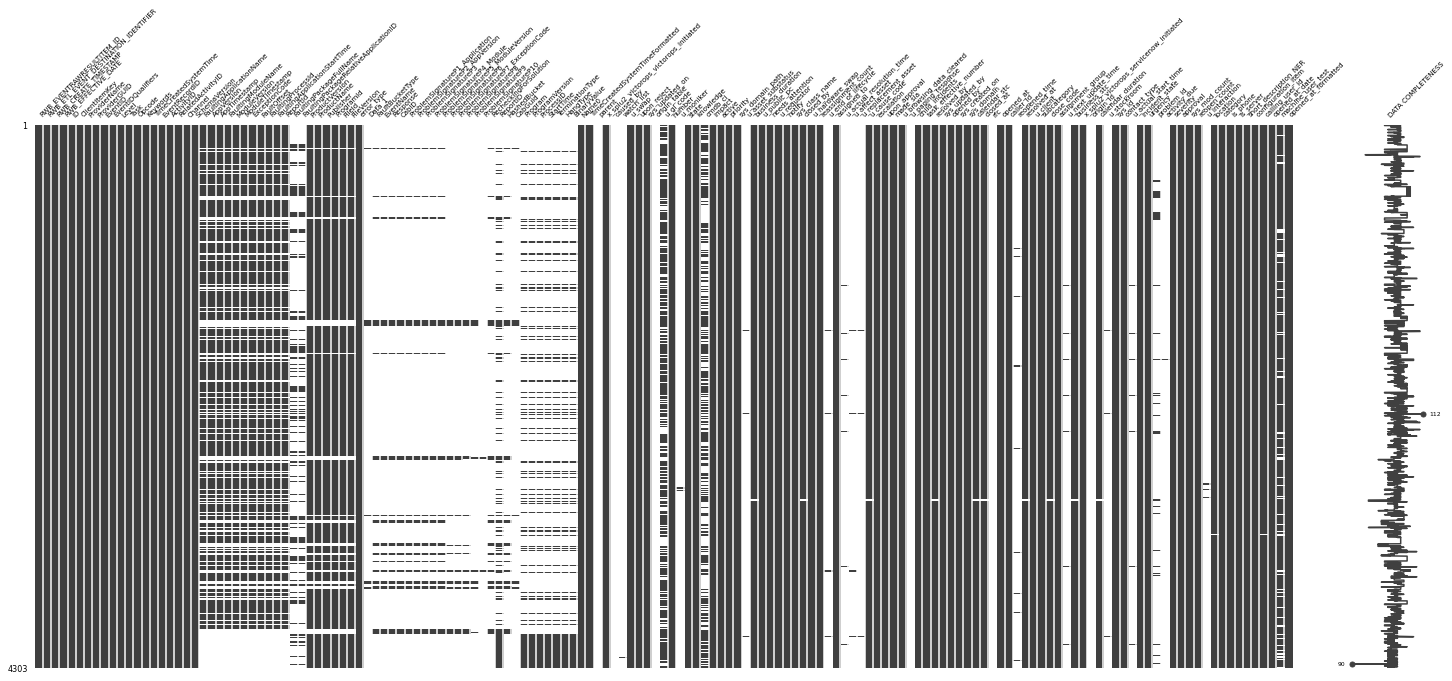

In [34]:
msno.matrix(incs_merged, labels=True, fontsize=7)

In [35]:
# Issues:
# If a separate error is recorded on the same day as an unrelated INC, the two are associated (.loc[210, :])
# Possible fix: reduce the time window from "same day" to "within x hours," e.g. +/-2hrs.
incs_merged.sample(5)[[
    'error_type',
    'OSVersion',
    'FaultingApplicationName',
    'FaultingModuleName',
    # 'FaultingPackageFullName',
    'ProductName',
    'Program',
    'category',
    'subcategory',
    'short_description_NER'
]]

KeyError: "['OSVersion'] not in index"

In [ ]:
incs_merged['number'].unique()

In [ ]:
# INCs w/ multiple events assc. may attribute the event to the INC
# despite the event occurring *after* the INC was already filed.
incs_merged[incs_merged['number'] == 'INC0515837'][[
    'TimeCreatedSystemTimeFormatted',
    'TimeCreatedSystemTime',
    'opened_at',
    'opened_at_formatted',
    'Name0',
    'configuration_item',
    'number',
    'FaultingApplicationName',
    'FaultingModuleName',
    'short_description_NER'
]]


#### Join INCs to machine + boot.


In [36]:
incs_boot = machines_boot.merge(incs, left_on=['Name0', 'BootId'], right_on=['configuration_item', 'opened_at_formatted'])

In [37]:
incs_boot

,RWB_EVENTBOOTRESULT_ID,RWB_ETL_EVENT_DESTINATION_IDENTIFIER,RWB_CREATE_TIMESTAMP,RWB_EFFECTIVE_DATE,ID,EventListID,ClientItemKey,GeneratedTime,UpdateDurationInMilliseconds,GPDurationInMilliseconds,...,location,category,is_phone,is_server,short_description_NER,configuration_item,calling_user_id,opened_at_date,machine_user_test,opened_at_formatted
0,949656,1251,2023-02-01 09:02:13 -06:00,2023-02-01,72057594043080687,3,16792948,2023-02-01 09:22:37.737,0,0,...,{'link': 'https://rwbaird.service-now.com/api/...,network_cabling,0,0,pc not connecting to network,ASH-D-U25377,1521.0,2023-01-31,ASH-D-U25377,2023-01-31
1,949657,1251,2023-02-01 09:02:13 -06:00,2023-02-01,72057594043080688,3,16792948,2023-02-01 09:22:37.737,0,0,...,{'link': 'https://rwbaird.service-now.com/api/...,network_cabling,0,0,pc not connecting to network,ASH-D-U25377,1521.0,2023-01-31,ASH-D-U25377,2023-01-31
2,949659,1251,2023-02-01 09:02:13 -06:00,2023-02-01,72057594043080690,3,16792948,2023-02-01 09:22:37.737,0,0,...,{'link': 'https://rwbaird.service-now.com/api/...,network_cabling,0,0,pc not connecting to network,ASH-D-U25377,1521.0,2023-01-31,ASH-D-U25377,2023-01-31
3,949655,1251,2023-02-01 09:02:13 -06:00,2023-02-01,72057594043080686,3,16792948,2023-02-01 09:22:37.737,0,13514,...,{'link': 'https://rwbaird.service-now.com/api/...,network_cabling,0,0,pc not connecting to network,ASH-D-U25377,1521.0,2023-01-31,ASH-D-U25377,2023-01-31
4,949660,1251,2023-02-01 09:02:13 -06:00,2023-02-01,72057594043080691,3,16792948,2023-02-01 09:22:37.737,0,11379,...,{'link': 'https://rwbaird.service-now.com/api/...,network_cabling,0,0,pc not connecting to network,ASH-D-U25377,1521.0,2023-01-31,ASH-D-U25377,2023-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5312,1483399,8025,2023-05-20 08:35:27 -05:00,2023-05-20,72057594043641419,3,16813765,2023-05-19 23:30:53.757,0,16809,...,{'link': 'https://rwbaird.service-now.com/api/...,laptop,0,0,FW: Screen shot,PIT-L-U21589,9094.0,2023-05-19,PIT-L-U21589,2023-05-19
5313,1483746,8025,2023-05-20 08:35:27 -05:00,2023-05-20,72057594043641766,3,16811183,2023-05-20 01:39:37.853,53159,13837,...,{'link': 'https://rwbaird.service-now.com/api/...,Microsoft Outlook 365,0,0,Outlook rules not working / general slowness,DUR-L-U32898,3944.0,2023-05-19,DUR-L-U32898,2023-05-19
5314,1483746,8025,2023-05-20 08:35:27 -05:00,2023-05-20,72057594043641766,3,16811183,2023-05-20 01:39:37.853,53159,13837,...,{'link': 'https://rwbaird.service-now.com/api/...,Microsoft Outlook 365,0,0,Outlook rules not working / general slowness,DUR-L-U32898,3944.0,2023-05-19,DUR-L-U32898,2023-05-19
5315,1484152,8025,2023-05-20 08:35:27 -05:00,2023-05-20,72057594043642172,3,16795890,2023-05-20 04:24:55.647,0,18555,...,{'link': 'https://rwbaird.service-now.com/api/...,citrix,0,0,Citrix VDA needed asap- CHE - D - U27461,CHE-D-U27461,12384.0,2023-05-19,CHE-D-U27461,2023-05-19


In [33]:
# Dropping columns with nothing in them.
incs_merged.dropna(axis=1, how='all', inplace=True)


#### How many multiple INCs were filed on the same day for a given machine?


In [52]:
grouped_counts = incs.groupby(['opened_at_formatted', 'configuration_item']).size()
print(grouped_counts[grouped_counts > 1].sum())
grouped_counts[grouped_counts > 1]

416


opened_at_formatted  configuration_item
2023-01-03           CHI-L-U33511          2
                     LOE-D-U25294          2
                     MWE-L-U29955          2
2023-01-04           MIL-L-U21470          2
                     MIL-L-U30749          2
                                          ..
2023-07-05           MIL-L-U34247          2
                     TCF-L-U34494          2
2023-07-06           MIL-D-U25226          2
2023-07-10           CHI-L-U34590          2
                     PIT-L-U33237          2
Length: 200, dtype: int64


# Explore 'Application' errors.


In [43]:
df = pd.concat([incs_merged, incs_boot])

In [44]:
# Dropping columns with nothing in them.
df.dropna(axis=1, how='all', inplace=True)

In [41]:
# df = df[df['error_type'] == 'Application']

,RWB_EVENTRAWRESULTITEM_ID,RWB_ETL_EVENT_DESTINATION_IDENTIFIER,RWB_CREATE_TIMESTAMP,RWB_EFFECTIVE_DATE,ID,ClientItemKey,ProviderName,ProviderGUID,EventID,EventIDQualifiers,...,OSVersion,BootReason,SystemPowerOffTime,MachineName,Reason,param5,ActionDescription,correlation_display,correlation_id,company
0,4950960.0,5671,2023-04-12 08:46:15 -05:00,2023-04-12,72057594084846230,16814273,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4950962.0,5671,2023-04-12 08:46:15 -05:00,2023-04-12,72057594084846232,16814273,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4873717.0,5547,2023-04-10 08:45:57 -05:00,2023-04-10,72057594084767567,16814273,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4958674.0,5671,2023-04-12 08:46:15 -05:00,2023-04-12,72057594084854087,16807529,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4960847.0,5671,2023-04-12 08:46:15 -05:00,2023-04-12,72057594084856329,16814645,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3984,5027491.0,5733,2023-04-13 08:46:22 -05:00,2023-04-13,72057594084923826,16816907,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3987,5030297.0,5733,2023-04-13 08:46:22 -05:00,2023-04-13,72057594084926636,16814501,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3988,5047606.0,5733,2023-04-13 08:46:22 -05:00,2023-04-13,72057594084943998,16802671,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3989,5047607.0,5733,2023-04-13 08:46:22 -05:00,2023-04-13,72057594084943999,16802671,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

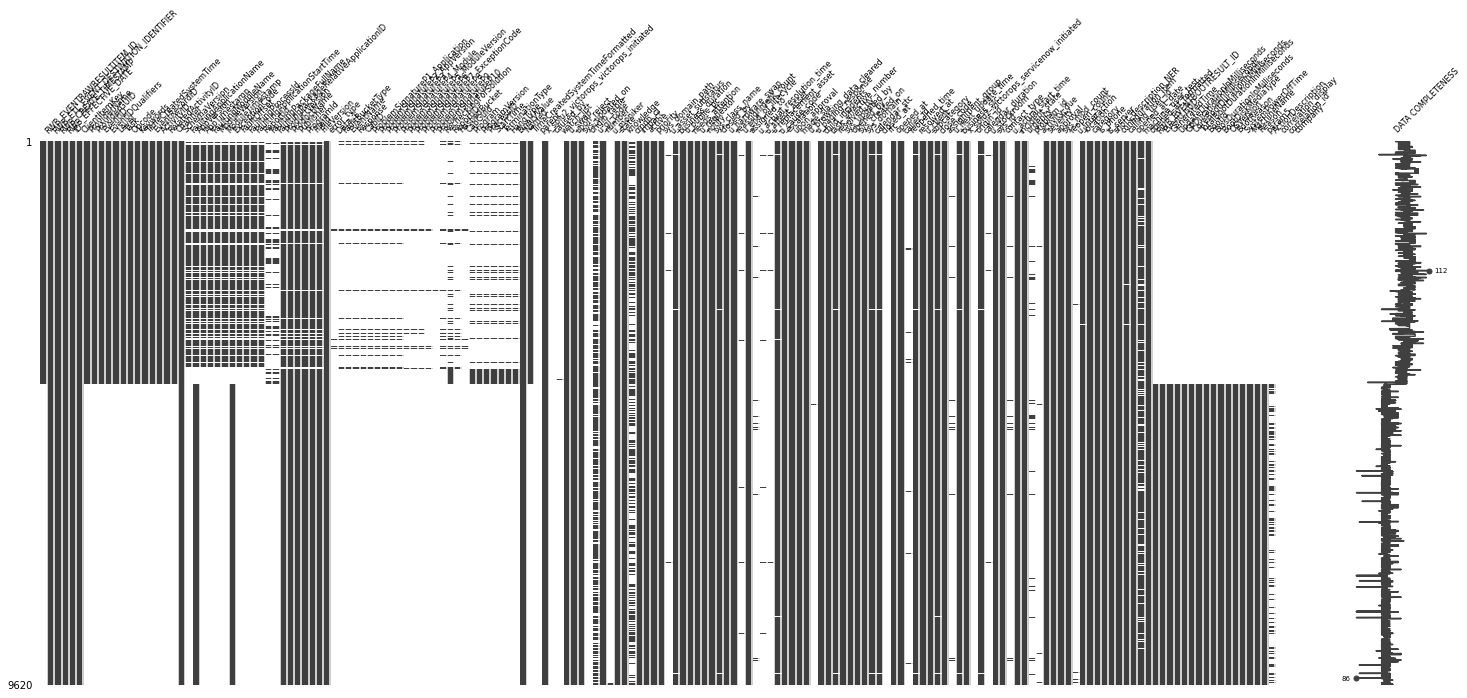

In [45]:
msno.matrix(df, labels=True, fontsize=8)

<AxesSubplot:>

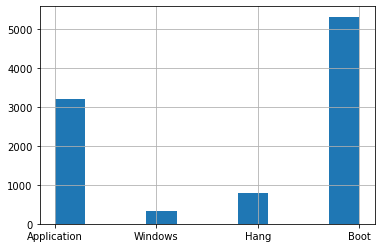

In [46]:
df['error_type'].hist()

In [47]:
df[df['error_type'] == 'Boot']

,RWB_EVENTRAWRESULTITEM_ID,RWB_ETL_EVENT_DESTINATION_IDENTIFIER,RWB_CREATE_TIMESTAMP,RWB_EFFECTIVE_DATE,ID,ClientItemKey,ProviderName,ProviderGUID,EventID,EventIDQualifiers,...,OSVersion,BootReason,SystemPowerOffTime,MachineName,Reason,param5,ActionDescription,correlation_display,correlation_id,company
0,NaN,1251,2023-02-01 09:02:13 -06:00,2023-02-01,72057594043080687,16792948,NaN,NaN,NaN,NaN,...,7227.0,1074.0,2023-01-31T19:08:07.6267429Z,C:\Windows\System32\RuntimeBroker.exe (ASH-D-U...,Other (Unplanned),power off,None,NaN,NaN,NaN
1,NaN,1251,2023-02-01 09:02:13 -06:00,2023-02-01,72057594043080688,16792948,NaN,NaN,NaN,NaN,...,7227.0,1074.0,2023-01-31T19:13:33.1447390Z,C:\Windows\System32\RuntimeBroker.exe (ASH-D-U...,Other (Unplanned),restart,None,NaN,NaN,NaN
2,NaN,1251,2023-02-01 09:02:13 -06:00,2023-02-01,72057594043080690,16792948,NaN,NaN,NaN,NaN,...,7227.0,1074.0,2023-01-31T19:20:43.1740171Z,C:\Windows\System32\RuntimeBroker.exe (ASH-D-U...,Other (Unplanned),restart,None,NaN,NaN,NaN
3,NaN,1251,2023-02-01 09:02:13 -06:00,2023-02-01,72057594043080686,16792948,NaN,NaN,NaN,NaN,...,7227.0,1074.0,2023-01-31T07:00:10.9237968Z,C:\Program Files\1E\NightWatchman\NwmSvc.exe (...,No title for this reason could be found,restart,Reboot initiated by NightWatchman 7.3,NaN,NaN,NaN
4,NaN,1251,2023-02-01 09:02:13 -06:00,2023-02-01,72057594043080691,16792948,NaN,NaN,NaN,NaN,...,7227.0,1074.0,2023-01-31T19:50:51.6796410Z,C:\Windows\System32\RuntimeBroker.exe (ASH-D-U...,Other (Unplanned),restart,None,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5312,NaN,8025,2023-05-20 08:35:27 -05:00,2023-05-20,72057594043641419,16813765,NaN,NaN,NaN,NaN,...,7227.0,1074.0,2023-05-19T17:06:20.4004413Z,C:\windows\system32\winlogon.exe (PIT-L-U21589),No title for this reason could be found,restart,None,NaN,NaN,NaN
5313,NaN,8025,2023-05-20 08:35:27 -05:00,2023-05-20,72057594043641766,16811183,NaN,NaN,NaN,NaN,...,7227.0,1074.0,2023-05-19T09:30:35.8805861Z,C:\Program Files\1E\NightWatchman\NwmSvc.exe (...,No title for this reason could be found,restart,Reboot initiated by NightWatchman 7.3,NaN,NaN,NaN
5314,NaN,8025,2023-05-20 08:35:27 -05:00,2023-05-20,72057594043641766,16811183,NaN,NaN,NaN,NaN,...,7227.0,1074.0,2023-05-19T09:30:35.8805861Z,C:\Program Files\1E\NightWatchman\NwmSvc.exe (...,No title for this reason could be found,restart,Reboot initiated by NightWatchman 7.3,NaN,NaN,NaN
5315,NaN,8025,2023-05-20 08:35:27 -05:00,2023-05-20,72057594043642172,16795890,NaN,NaN,NaN,NaN,...,7227.0,1074.0,2023-05-19T06:00:10.8154752Z,C:\Program Files\1E\NightWatchman\NwmSvc.exe (...,No title for this reason could be found,restart,Reboot initiated by NightWatchman 7.3,NaN,NaN,NaN



#### How many INCs contain direct reference to BSOD?


In [48]:
len(df[df['short_description_NER'].str.contains("(?i)Blue Screen|BSOD|[Dd]eath")]['number'].unique())

55


#### What is the distribution of FaultApplicationName among INCs?


In [53]:
df_check = df[df['error_type'] == 'Application']

In [54]:
df_check['FaultingApplicationName'].value_counts()

powershell.exe                 507
EXCEL.EXE                      268
Acrobat.exe                    182
RuntimeBroker.exe              146
SearchApp.exe                  145
                              ... 
BarcoClickShareSvc.exe           1
Passport.exe                     1
AdobeNotificationClient.exe      1
DesktopInfo.exe                  1
DellOptimizer.exe                1
Name: FaultingApplicationName, Length: 136, dtype: int64


#### What is the distribution of modules among INCs?


In [55]:
df_check['FaultingModuleName'].value_counts()

KERNELBASE.dll         824
BIOSIntf.dll           504
ntdll.dll              288
Windows.UI.Xaml.dll    115
WavesSvc64.exe         110
                      ... 
b_puuhpvka.dll           1
o_rrrkctrn.dll           1
m_vstosktn.dll           1
f_sbnfpoqx.dll           1
j_zpupthsh.dll           1
Name: FaultingModuleName, Length: 387, dtype: int64


#### Which exception codes are most common among INCs?


In [56]:
df_check[['FaultingApplicationName', 'ExceptionCode']].value_counts()

FaultingApplicationName     ExceptionCode
powershell.exe              c0000005         504
ShellExperienceHost.exe     c000027b         137
WavesSvc64.exe              c0000005         110
Thomson One 5.0.exe         c0000005         103
TextInputHost.exe           c000027b          95
                                            ... 
PfuSshMonWCFHost.exe        c0000374           1
EXCEL.EXE                   80131623           1
Thomson One 5.0.exe         4000001f           1
Thomson One 5.0 Chrome.exe  c0000005           1
Thomson One 5.0.exe         c000001d           1
Length: 253, dtype: int64